# Naive Bayes

Objective: Predict whether the person donate blood in specific month  
Dataset: transfusion.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('transfusion.data')
print(data.shape)
data.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
data.columns = ['recency','frequency','monetary','time','donated']
data.head()

,recency,frequency,monetary,time,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

0    570
1    178
Name: donated, dtype: int64


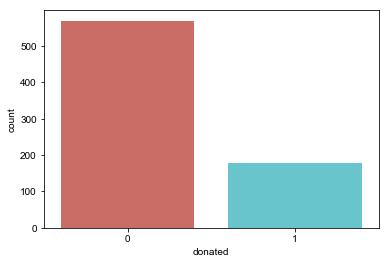

In [3]:
print(data['donated'].value_counts())  #1-over 55, 0-lower 55

sns.countplot(x='donated',data = data, palette='hls',order = data['donated'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

## Correlation

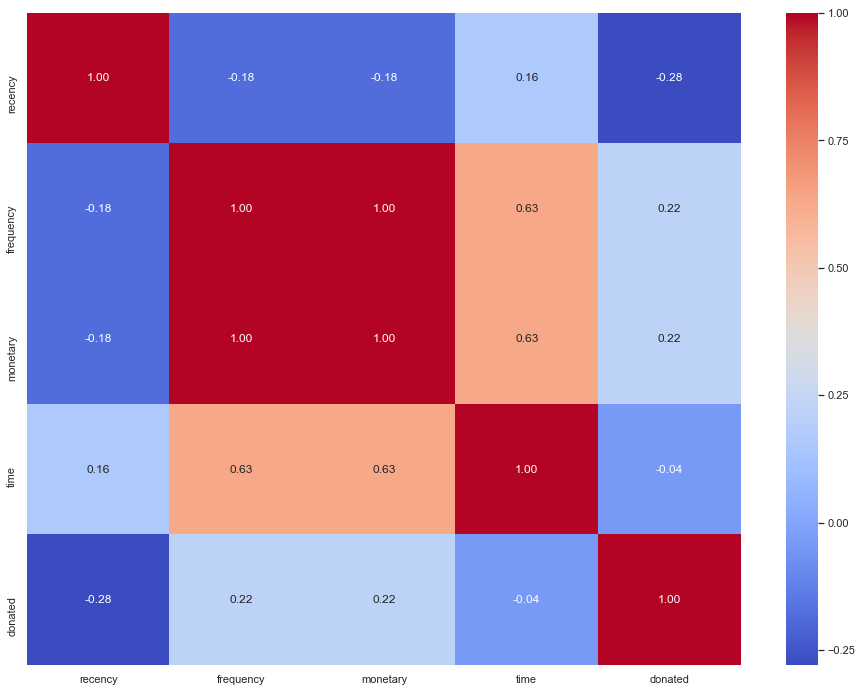

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["donated"].sort_values(ascending=False)

donated      1.000000
frequency    0.218633
monetary     0.218633
time        -0.035854
recency     -0.279869
Name: donated, dtype: float64

## Data Processing and Selection

In [6]:
X = data[['recency','frequency','monetary','time']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (748, 4)


array([[    2,    50, 12500,    98],
       [    0,    13,  3250,    28]], dtype=int64)

In [7]:
y = data["donated"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (748,)


0    1
1    1
2    1
3    1
4    0
Name: donated, dtype: int64

## Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (748, 4)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (598, 4) (598,)
X TEST Set :  (150, 4) (150,)


## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nbayes = GaussianNB()
nbayes.fit(X_train,y_train)

y_pred = nbayes.predict(X_test)
nbayes.score(X_train,y_train)

print('Naive Bayes Accuracy Score:', round(metrics.accuracy_score(y_test,y_pred),4))

Naive Bayes Accuracy Score: 0.7333


## Test Prediction

In [11]:
df_pred1 = data[data.index == 105]
df_pred2 = data[data.index == 500]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,recency,frequency,monetary,time,donated
105,6,17,4250,70,0
500,2,43,10750,86,1


In [12]:
Xp = df_pred[['recency','frequency','monetary','time']].values
yp = df_pred["donated"]
Xp = scaler.transform(Xp)

pred = nbayes.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([1, 1], dtype=int64)